# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

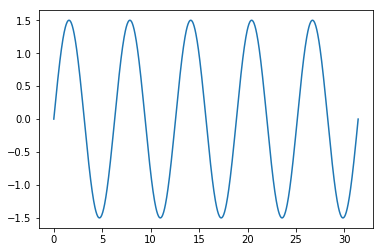

In [27]:
# Let's first try linear force  Fx=-x

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as p
import numpy as np
%matplotlib inline

#   Initialization
a = 0.
b = 10.*np.pi
n = 1000                               
omega0=1.
omega=0.
alpha=0.
force=0.

ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0;   y[1] = 1.5
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]# finish this line                                            
    #fReturn[1] = -omega0**2*np.sin(y[0])     
    fReturn[1] = -omega0**2*(y[0])     
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, n):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()

* Start your pendulum at $\theta$ = 0 with $\dot{\theta}\neq 0$.   Gradually increase $\dot{\theta}$ to increase the importance of nonlinear effects.

* Test your program for the linear case (sin $\theta$ -> $\theta$) and verify that

    a) your solution is harmonic with frequency $\omega_{0}$ = 2$\pi$/$T_{0}$, and

    b) the frequency of oscillation is independent of the amplitude.

* For the realistic case with sin $\theta$, observe the change in period
as function of increasing initial velocity.

* Try the intial velocity of 2 and 2.1 to see how the motion changes from oscillatory 
to rotational ("over the top").

# Visualization: Phase-Space Orbits

* Try different initial y[1] to show that the orbit in the phase space (x,v) is
ellipitcal like. With larger y[1] (nonlinearity), the ellipse shows distinct corners. 

* How does the phase space orbit look like when the motion is rotationary 

* Try y[1]=0.1, 0.5, 1.5, 1.9, 2.0, 2.2, 2.5, and store xp and yp after each run.
Finally plot all these orbits into one plot. 

# Chaos in Phase Space


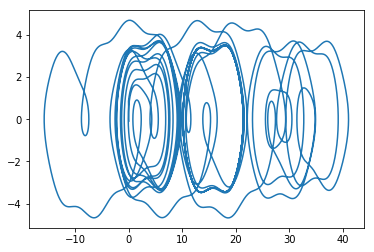

In [45]:
# Let's first try linear force  Fx=-x

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
b = 100.*np.pi
h = 0.03                              
omega0=1.
omega=0.666
alpha=0.2
force=2

ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = -0.0888;   y[1] = 0.8
t = a;       
time=np.array([0.0])
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]# finish this line                                            
    fReturn[1] = -omega0**2*np.sin(y[0]) - alpha * y[1] + force * np.cos(omega*t)  # finish this line 
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, n):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    time=np.append(time,t)
    xp=np.append(xp, y[0])
    yp=np.append(yp,y[1])
    
    
p.plot(xp,yp)
p.show()

* Take your solution to the realistic pendulum and include friction. Run it for a variety of initial conditions, including over-the-top ones. Because no energy is fed to the system, you should see spirals in phase space.

* Without friction but with a small driving torque, you obtain a
perturbed ellipse in phase space. 

* Explore Chaos: $\omega_{0}=1$, a=0.2, f=0.52, and $\omega$=0.666. 
Try (($x_{0}, v_{0}$)=(-0.0885, 0.8), (-0.0883, 0.8), (-0.0888,0.8)) to see the differences. 
(Make the final time b longer to see if new features will rise)